## Full data set from National Renewable Energy Laboratory

https://openpv.nrel.gov/

*16dec2017*  This is the second time though load up and variable examination after noticing that some variables had been overlooked in the first pass.

This cell describes the work in this notebook.

* set up
    * load data using (parsed) date as index
        read_csv warns about mixed type cols
        note: this takes a few minutes.
    * list columns
    * list columns with mixed type
    * get df info

* describe columns in term of level of interest.  A variable can be interesting for modeling or because it suggests a good question to ask.
    * 38 nonnull cols
    * 42 completely null cols
    * drop all   completely null cols

* manage the index
    * some bogus dates
    * look at timeline (where's the data)
    * 2006 though 2015 has 96% of the data
    * note possible date restriction for cleaning phase
 
* examine each nonnull variable part 1 - useful fields (13 variables).  
    * size and cost - 3 vars
    * geography - 4 vars
    * other - 6 vars
    * Note opportunities for cleaning
    
*   examine each nonnull variable part 2 - possibly useful fields (26 variables).  
    * note number of nonnull values
    * Decide if useful (keep or drop?). 
    * Note opportunities for cleaning.

In [1]:
# set up
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Load data; check columns

In [2]:
dfFull = pd.read_csv('../local/data/openpv_all_master.csv', index_col='date_installed', parse_dates=True)

C:\Users\saus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2,5,8,12,13,14,15,16,20,23,25,26,27,28,32,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# list columns
dfFull.columns

Index(['state', 'incentive_prog_names', 'type', 'size_kw', 'appraised',
       'zipcode', 'install_type', 'installer', 'cost_per_watt', 'cost',
       'lbnl_tts_version_year', 'lbnl_tts', 'city', 'utility_clean', 'tech_1',
       'model1_clean', 'county', 'annual_PV_prod', 'annual_insolation',
       'rebate', 'sales_tax_cost', 'tilt1', 'tracking_type', 'azimuth1',
       'manuf2_clean', 'manuf3_clean', 'manuf1_clean', 'inv_man_clean',
       'reported_annual_energy_prod', 'incentivetype', 'year_app_implied',
       'year', 'npv_fit_real', 'application_implied', 'npv_pbi_real',
       'other_incentive', 'appraised_cluster', 'inflation',
       'other_incentive_real', 'zip_available', 'cust_city', 'pbi', 'pbi_real',
       'pbi_length', 'application', 'fit_length', 'fit_rate', 'fit_payment',
       '_3rdparty_implied', 'utility', 'install_price_real_w', 'install_price',
       'installer_clean', 'manuf1_', 'inverter_reported', 'rebate_real',
       'model1', '_3rdparty', 'inv_model_repo

In [4]:
# maybe funky column data - mixed type
print([list(enumerate(dfFull.columns))[i] for i in (2,5,8,12,13,14,15,16,20,23,25,26,27,28,32,50)])

[(2, 'type'), (5, 'zipcode'), (8, 'cost_per_watt'), (12, 'city'), (13, 'utility_clean'), (14, 'tech_1'), (15, 'model1_clean'), (16, 'county'), (20, 'sales_tax_cost'), (23, 'azimuth1'), (25, 'manuf3_clean'), (26, 'manuf1_clean'), (27, 'inv_man_clean'), (28, 'reported_annual_energy_prod'), (32, 'npv_fit_real'), (50, 'install_price_real_w')]


In [5]:
# tell me more
dfFull.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1020521 entries, 2013-12-12 to 2017-08-18
Data columns (total 80 columns):
state                          1020521 non-null object
incentive_prog_names           797958 non-null object
type                           1020516 non-null object
size_kw                        1020516 non-null float64
appraised                      224036 non-null object
zipcode                        1020516 non-null float64
install_type                   977940 non-null object
installer                      702466 non-null object
cost_per_watt                  762941 non-null float64
cost                           763102 non-null float64
lbnl_tts_version_year          797958 non-null float64
lbnl_tts                       797958 non-null object
city                           798954 non-null object
utility_clean                  792720 non-null object
tech_1                         580919 non-null object
model1_clean                   580919 non-null object

#### Some of these columns were overlooked the first time through the data.
#### This list only includes columns with at least some data.

1. indent indicates examined in first pass
1. '*' indicates possible use
1. '-' indicates probably useless
1. '=' indicates ambiguous
1. '#' indicates column completely null


### 38 nonnull columns
```
    *state                          1020521 non-null object
*incentive_prog_names           797958 non-null object
    -type                           1020516 non-null object
    *size_kw                        1020516 non-null float64
*appraised                      224036 non-null object
    *zipcode                        1020516 non-null float64
    *install_type                   977940 non-null object
    *installer                      702466 non-null object
    **cost_per_watt                  762941 non-null float64
    *cost                           763102 non-null float64
-lbnl_tts_version_year          797958 non-null float64
-lbnl_tts                       797958 non-null object
    *city                           798954 non-null object
-utility_clean                  792720 non-null object
*tech_1                         580919 non-null object
-model1_clean                   580919 non-null object
    *county                         998652 non-null object
*annual_PV_prod                 780969 non-null float64
-annual_insolation              780969 non-null float64
*rebate                         386698 non-null object
-sales_tax_cost                 355309 non-null float64
-tilt1                          383365 non-null float64
-tracking_type                  526058 non-null object
-azimuth1                       363281 non-null float64
=manuf2_clean                   231607 non-null object
=manuf3_clean                   209653 non-null object
=manuf1_clean                   201121 non-null object
=inv_man_clean                  49933 non-null object
-reported_annual_energy_prod    204429 non-null float64
-year                           68 non-null object
=pbi_length                     5427 non-null float64
*utility                        2117 non-null object
-bipv_3                         5255 non-null float64
-bipv_2                         5255 non-null float64
-bipv_1                         5255 non-null float64=
    *new_constr                     27106 non-null float64
    *tracking                       1930 non-null float64
    *3rdparty                       306993 non-null float64
```

### 42 null columns

```
#npv_fit_real                   0 non-null float64
#application_implied            0 non-null float64
#npv_pbi_real                   0 non-null float64
#other_incentive                0 non-null float64
#appraised_cluster              0 non-null float64
#inflation                      0 non-null float64
#other_incentive_real           0 non-null float64
#zip_available                  0 non-null float64
#cust_city                      0 non-null float64
#pbi                            0 non-null float64
#pbi_real                       0 non-null float64
#install_price_real_w           0 non-null float64
#install_price                  0 non-null float64
#installer_clean                0 non-null float64
#manuf1_                        0 non-null float64
#inverter_reported              0 non-null float64
#rebate_real                    0 non-null float64
#model1                         0 non-null float64
#_3rdparty                      0 non-null float64
#inv_model_reported             0 non-null float64
#microinv_solarhub              0 non-null float64
#application                    0 non-null float64
#fit_length                     0 non-null float64
#fit_rate                       0 non-null float64
#fit_payment                    0 non-null float64
#_3rdparty_implied              0 non-null float64
#effic_1                        0 non-null float64
#cust_county                    0 non-null float64
#sales_tax_rate                 0 non-null float64
#sales_tax_cost_real            0 non-null float64
#bipv_all                       0 non-null float64
#thinfilm_all                   0 non-null float64
#china                          0 non-null float64
#sys_sizeac                     0 non-null float64
#pbi_rate                       0 non-null float64
#incentivetype                  0 non-null float64
#year_app_implied               0 non-null float64
#mod_cost_real                  0 non-null float64
#inv_cost_real                  0 non-null float64
#bos_powerclerk_real            0 non-null float64
#permitting_real                0 non-null float64
#inv_model_clean                0 non-null float64
```

In [6]:
# drop all completely empty columns
dfFull.dropna(how='all', axis='columns', inplace=True)

In [7]:
dfFull.columns

Index(['state', 'incentive_prog_names', 'type', 'size_kw', 'appraised',
       'zipcode', 'install_type', 'installer', 'cost_per_watt', 'cost',
       'lbnl_tts_version_year', 'lbnl_tts', 'city', 'utility_clean', 'tech_1',
       'model1_clean', 'county', 'annual_PV_prod', 'annual_insolation',
       'rebate', 'sales_tax_cost', 'tilt1', 'tracking_type', 'azimuth1',
       'manuf2_clean', 'manuf3_clean', 'manuf1_clean', 'inv_man_clean',
       'reported_annual_energy_prod', 'year', 'pbi_length', 'utility',
       'bipv_3', 'bipv_2', 'bipv_1', 'new_constr', 'tracking', '3rdparty'],
      dtype='object')

In [8]:
len(dfFull.columns)

38

In [9]:
dfFull.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1020521 entries, 2013-12-12 to 2017-08-18
Data columns (total 38 columns):
state                          1020521 non-null object
incentive_prog_names           797958 non-null object
type                           1020516 non-null object
size_kw                        1020516 non-null float64
appraised                      224036 non-null object
zipcode                        1020516 non-null float64
install_type                   977940 non-null object
installer                      702466 non-null object
cost_per_watt                  762941 non-null float64
cost                           763102 non-null float64
lbnl_tts_version_year          797958 non-null float64
lbnl_tts                       797958 non-null object
city                           798954 non-null object
utility_clean                  792720 non-null object
tech_1                         580919 non-null object
model1_clean                   580919 non-null object

In [10]:
dfFull.head()

,state,incentive_prog_names,type,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,cost,...,reported_annual_energy_prod,year,pbi_length,utility,bipv_3,bipv_2,bipv_1,new_constr,tracking,3rdparty
date_installed,,,,,,,,,,,,,,,,,,,,,
2013-12-12,TX,Austin Energy,uir,10.56,NaN,78702.0,residential,NaN,2.897777,30600.53,...,13836.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-11,TX,Austin Energy,uir,12.72,NaN,78702.0,residential,NaN,3.144654,40000.00,...,16419.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-17,TX,Austin Energy,uir,5.40,NaN,78702.0,residential,NaN,4.197330,22665.58,...,7235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-27,TX,Austin Energy,uir,7.50,NaN,78702.0,residential,NaN,3.750000,28125.00,...,9340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-26,TX,Austin Energy,uir,5.00,NaN,78702.0,residential,NaN,3.850000,19250.00,...,6729.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Manage the index (installation_date)

Sort the data by installation date. Examine the data by date.

In [11]:
dfFull.sort_index(inplace=True)

In [12]:
# clearly, we have some bogus dates
dfFull.head()

,state,incentive_prog_names,type,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,cost,...,reported_annual_energy_prod,year,pbi_length,utility,bipv_3,bipv_2,bipv_1,new_constr,tracking,3rdparty
date_installed,,,,,,,,,,,,,,,,,,,,,
1909-07-07,IN,NaN,uir,4.90,NaN,47401.0,Residential,Stumpner,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909-07-07,IN,NaN,uir,7.35,NaN,47401.0,Residential,Stumpner,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909-07-07,IN,NaN,uir,3.90,NaN,47408.0,Residential,Stumpner,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909-07-07,IN,NaN,uir,9000.00,NaN,46222.0,Commercial,JMS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969-12-31,FL,NaN,uir,5.52,NaN,32653.0,Residential,NaN,5.9,32568.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#  okay, this is important.  Very little data before 2001 and after 2015.
#  
byYear = dfFull.groupby(dfFull.index.year)
byYear.size()

date_installed
1909.0         4
1969.0       119
1983.0         2
1984.0         1
1986.0         1
1988.0         1
1992.0         1
1994.0        11
1995.0        14
1996.0        27
1997.0       104
1998.0        98
1999.0      1428
2000.0       625
2001.0      2890
2002.0      5524
2003.0      7080
2004.0     10963
2005.0     10682
2006.0     17360
2007.0     29472
2008.0     32409
2009.0     53681
2010.0     78182
2011.0     88620
2012.0    121354
2013.0    122679
2014.0    170873
2015.0    265750
2016.0       349
2017.0       212
dtype: int64

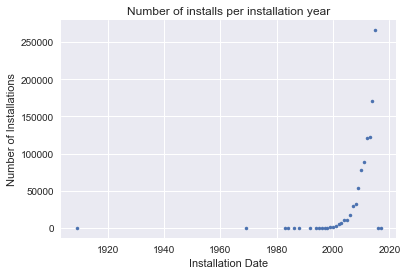

In [14]:
# plot data size per year
byYear.size().plot( marker='.', linestyle='none')
plt.title('Number of installs per installation year')
plt.ylabel('Number of Installations')
plt.xlabel('Installation Date');

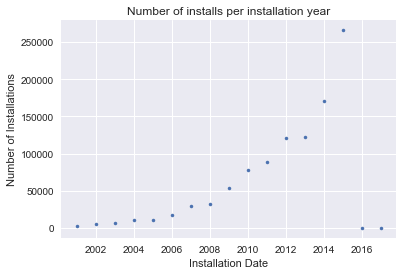

In [15]:
# zoom in a little on recent
bYsizes = byYear.size()
bYsizes[bYsizes.index > 2000].plot(marker='.', linestyle='none')
plt.title('Number of installs per installation year')
plt.ylabel('Number of Installations')
plt.xlabel('Installation Date');

In [16]:
# how big is the dataset?
byYearSize = byYear.size()
byYearSize.sum()

1020516

In [17]:
# how big is the 10 years 2006-2015?
byYearSize[(byYearSize.index >= 2006) & (byYearSize.index < 2016)].sum()

980380

In [18]:
# what fraction is that 10 years of the total? 96%
byYearSize[(byYearSize.index >= 2006) & (byYearSize.index < 2016)].sum()/byYearSize.sum()

0.96067087630179238

### Decision point:

There are clearly some dates that got mis-parsed (1909, 1969) but there are only ~120.
More important, we see that 2004 is the first year that installs exceed 10k/year.

###### Cleaning note: some of that "1969" data has very odd fields.

I'm not going to do it now, but I think we should keep 10 year history for 2006-2015 for modeling.
This represents 96% of the data.

### Examine columns - part i: useful fields

#### Size and cost
```
size_kw                        1020516 non-null float64
cost_per_watt                  762941 non-null float64
cost                           763102 non-null float64
```

#### Geography
```
state                          1020521 non-null object
zipcode                        1020516 non-null float64
city                           798954 non-null object
county                         998652 non-null object
```

#### Other
```
type                           1020516 non-null object
install_type                   977940 non-null object
installer                      702466 non-null object
new_constr                     27106 non-null float64
tracking                       1930 non-null float64
3rdparty                       306993 non-null float64
```

### No cleaning in this phase

For now, we look at the data, check for problems and if possible get an idea of distribution.  

we defer problem resolution to a separate cleaning phase.

###  size and cost

In [19]:
dfFull[['cost_per_watt', 'size_kw', 'cost']].describe()

,cost_per_watt,size_kw,cost
count,762941.000000,1.020516e+06,7.631020e+05
mean,5.917931,1.618668e+01,6.489847e+04
std,2.069016,8.817405e+02,4.909837e+05
min,0.000000,2.000000e-03,0.000000e+00
25%,4.599632,3.709400e+00,2.104600e+04
50%,5.520000,5.490000e+00,3.022200e+04
75%,7.155000,7.850000e+00,4.361500e+04
max,30.000000,7.373190e+05,1.522000e+08


##### Comments
Cost_per_watt is the most important variable because it is the value we'll be modeling.  It is not completely populated (763k/1.02M).  Given min=0 and max=30, cost_per_watt has some outliers.

###### cost_per_watt

The distribution looks fairly reasonable for the data we have.   Median $5.52/watt

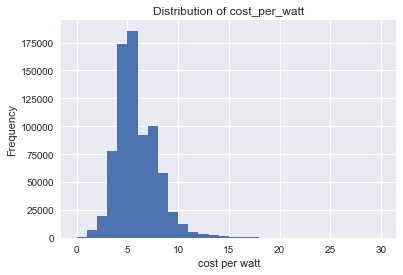

In [20]:
dfFull.cost_per_watt.plot(kind='hist', bins=30)
plt.title('Distribution of cost_per_watt')
plt.ylabel('Frequency')
plt.xlabel('cost per watt');

###### cost
Presumably this is the total cost of the installation.

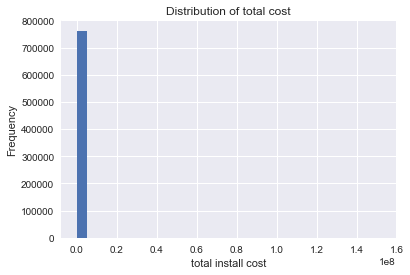

In [21]:
# something funny here.  Summary stats say median is $30k.  Mean is double that.
dfFull.cost.plot(kind='hist', bins=30)
plt.title('Distribution of total cost')
plt.ylabel('Frequency')
plt.xlabel('total install cost');

In [22]:
# I want to take the log10, but suspect some 0 values.  How many?
(dfFull.cost == 0).sum()

215

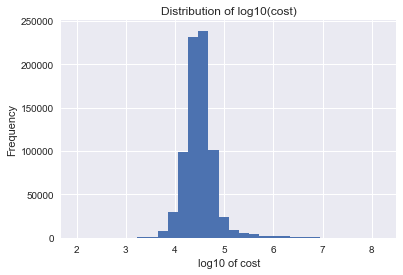

In [23]:
# Looks like maybe some bad data at the high end.  
np.log10(dfFull[~(dfFull.cost == 0)].cost).plot(kind='hist', bins=30)
plt.title('Distribution of log10(cost)')
plt.ylabel('Frequency')
plt.xlabel('log10 of cost');

##### size
Total kilowatts for installation.

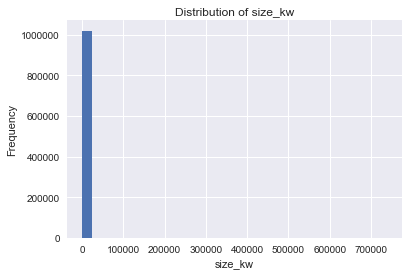

In [24]:
# looks a lot like the cost distribution
dfFull.size_kw.plot(kind='hist', bins=30)
plt.title('Distribution of size_kw')
plt.ylabel('Frequency')
plt.xlabel('size_kw');

In [25]:
# okay, no 0 values
(dfFull.size == 0).sum()

0

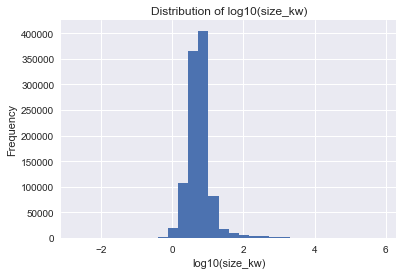

In [26]:
# Again, suspect problems at the high end.
# This kind of problem could be caused in data entry (1000s of watts rather than kw)
np.log10(dfFull.size_kw).plot(kind='hist', bins=30)
plt.title('Distribution of log10(size_kw)')
plt.ylabel('Frequency')
plt.xlabel('log10(size_kw)');

#### Geography
```
* state                          1020521 non-null object
* zipcode                        1020516 non-null float64
* city                           798954 non-null object
* county                         998652 non-null object
```

In [27]:
dfFull[['state', 'zipcode', 'city', 'county']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1020521 entries, 1909-07-07 to NaT
Data columns (total 4 columns):
state      1020521 non-null object
zipcode    1020516 non-null float64
city       798954 non-null object
county     998652 non-null object
dtypes: float64(1), object(3)
memory usage: 38.9+ MB


##### State

In [28]:
dfFull.state.describe()
# 63% of the data is California; there are perhaps some typos (55 states?)

count     1020521
unique         55
top            CA
freq       626820
Name: state, dtype: object

##### City

In [29]:
# 11k cities; not sure what I can do these.
dfFull.city.describe()

count        798954
unique        11296
top       SAN DIEGO
freq          13681
Name: city, dtype: object

##### County

In [30]:
# almost 10% in LA county.
dfFull.county.describe()

count          998652
unique           1039
top       Los Angeles
freq            82650
Name: county, dtype: object

##### Zipcode

In [31]:
# hmmm, shouldn't be any zeros but there are.  Only 1.
# this should probably be int
dfFull.zipcode.describe()

count    1.020516e+06
mean     7.195138e+04
std      3.548949e+04
min      0.000000e+00
25%      7.500200e+04
50%      9.202800e+04
75%      9.372200e+04
max      9.973700e+04
Name: zipcode, dtype: float64

In [32]:
(dfFull.zipcode == 0).sum()

1

### Other variables

$Installation\_type$ tells us whether or not an installation is at a home or business, school, government, etc.  There are potentially some interesting questions to ask about relative pricing among these groups, even though that's not the main thrust of this effort (residential).  If larger organizations pay less, it could provide a floor for residential installations.

Do costs vary by $installer$?  It may be possible to say something sensible depending on the data.

Is solar less or more expensive in $new\_construction$?

Do $3rd\_party$ owners pay more or less for PV installations?  How many third party installations occur and when?

```
type                           1020516 non-null object
install_type                   977940 non-null object
installer                      702466 non-null object
new_constr                     27106 non-null float64
tracking                       1930 non-null float64
3rdparty                       306993 non-null float6
```

##### Type

In [33]:
dfFull.type.value_counts()

uir    1020005
pir        511
Name: type, dtype: int64

In [34]:
# I don't know what this field means.  There are only 2 values and 1020005/1020516 are 'uir.
# This may be internal to LBNL/NREL.
dfFull.type.describe()

count     1020516
unique          2
top           uir
freq      1020005
Name: type, dtype: object

##### Install_type

In [35]:
dfFull.install_type.describe()

count          977940
unique             33
top       residential
freq           728661
Name: install_type, dtype: object

In [36]:
# some clean up needed (e.g. 'residential' vs. 'Residential')
dfFull.install_type.value_counts()

residential                    728661
Residential                    179321
commercial                      24470
Unknown                         15771
Commercial                      11908
unknown                          4034
government                       3721
nonprofit                        3003
Government                       2027
educational                      1703
Nonprofit                        1217
Educational                       710
Customer                          371
education                         290
Agricultural                      284
Utility                           138
agricultural                      124
utility                            92
Institutional                      29
Commercial - Other                 16
Gov't/NP                           11
Public                             11
agriculture                         5
Residential/SF                      5
public                              5
Nonresidential                      3
Commercial -

##### Installer

In [37]:
### 11k installers; that's a lot
dfFull.installer.describe()

count        702466
unique        10956
top       SolarCity
freq         168125
Name: installer, dtype: object

In [38]:
# let's look at the top 30
# wonder if DIY pays less?  how much?
dfFull.installer.value_counts().head(100)

SolarCity                             168125
Vivint                                 41615
Sunpower                               19925
Verengo                                16396
Sungevity                              14939
Rec Solar                              14291
PetersenDean                           11235
RGS/Real Goods                         10951
Sunrun                                  9968
Grid Alternatives                       8119
Trinity Heating & Air                   7966
Roof Diagnostics Solar & Electric       6012
Self                                    5345
American Solar Direct                   4917
Direct Energy Solar                     4761
American Solar Electric                 4453
Future Energy Corp                      4215
Sullivan Solar Power                    4186
Baker Electric                          3591
Solar Service Center                    3295
A1 Solar Power                          3180
Next Step Living                        3172
Solar Comp

In [39]:
dfFull.installer.value_counts().head(100).cumsum()/dfFull.installer.count()

SolarCity                             0.239335
Vivint                                0.298577
Sunpower                              0.326941
Verengo                               0.350282
Sungevity                             0.371548
Rec Solar                             0.391892
PetersenDean                          0.407886
RGS/Real Goods                        0.423475
Sunrun                                0.437665
Grid Alternatives                     0.449223
Trinity Heating & Air                 0.460563
Roof Diagnostics Solar & Electric     0.469122
Self                                  0.476731
American Solar Direct                 0.483730
Direct Energy Solar                   0.490508
American Solar Electric               0.496847
Future Energy Corp                    0.502847
Sullivan Solar Power                  0.508806
Baker Electric                        0.513918
Solar Service Center                  0.518609
A1 Solar Power                        0.523136
Next Step Liv

##### new_constr 

In [40]:
# presumably this is 1 if a new construction project; otherwise NA
# should be boolean?
dfFull.new_constr.describe()

count    27106.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: new_constr, dtype: float64

##### tracking

In [41]:
# presumably this is 1 if project has tracking; otherwise NA, meaning fixed
# should be boolean?
dfFull.tracking.describe()

count    1930.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: tracking, dtype: float64

##### 3rdparty 

In [42]:
# another value that could be boolean; there is a pretty large number of these

dfFull['3rdparty'].describe()

count    306993.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: 3rdparty, dtype: float64

### Examine columns - part ii: other possibly usable fields

##### dfFull.year (as opposed to the index)

In [43]:
# What is the 'year' variable.
# Only 68 non-null, while date_installed is fully populated
# This may be a field internal to NREL/LBNL
print(list(dfFull[dfFull.year.notnull()].year))

['1/1/1999', '1/1/1999', '1/1/1999', '1999', '1999', '1999', '1/1/2000', '1/1/2000', '1/1/2000', '1/3/2000', '1/1/2001', '1/1/2001', '1/1/2001', '1/1/2001', '1/1/2002', '1/1/2002', '1/1/2002', '1/1/2002', '1/1/2003', '1/1/2004', '1/1/2004', '1/1/2005', '1/1/2005', '1/1/2005', '1/1/2006', '1/1/2006', '1/1/2006', '1/1/2006', '1/1/2006', '1/1/2006', '1/1/2006', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/1/2007', '1/2/2007', '1/1/2008', '1/1/2008', '1/1/2008', '1/1/2008', '1/1/2008', '1/1/2008', '1/1/2008', '1/1/2008', '1/1/2008']


##### Incentive_program_name

In [44]:
### incentive program name
### data manual says these orgs may have provided the data
dfFull.incentive_prog_names.value_counts()

California Public Utilities Commission (Non-CSI Net Metered Systems)          260940
California Public Utilities Commission (California Solar Initiative)          148988
New York State Energy Research and Development Authority                       44012
Arizona Public Service                                                         40647
Massachusetts Clean Energy Center                                              36810
New Jersey Board of Public Utilities (SREC Program)                            34168
California Energy Commission (Emerging Renewables Program)                     27952
Massachusetts Department of Energy Resources                                   24828
Los Angeles Department of Water & Power                                        19757
California Energy Commission (New Solar Homes Partnership)                     17286
Connecticut Clean Energy Finance and Investment Authority                      15746
Salt River Project                                               

##### Appraised

In [45]:
### appraised
### data manual cautions that appraised values do not represent a transaction cost 
### (i.e. may not reflect market price)
dfFull.appraised.value_counts()

True    224036
Name: appraised, dtype: int64

##### dfFull.lbnl_tts and dfFull.lbnl_tts_version_year

In [46]:
### these next 2 have to do with LBNL's Tracking the Sun project
### probably of no use 
dfFull.lbnl_tts.value_counts()

True    797958
Name: lbnl_tts, dtype: int64

In [47]:
dfFull.lbnl_tts_version_year.value_counts()

2016.0    797958
Name: lbnl_tts_version_year, dtype: int64

##### utility and utility_clean

In [48]:
### what is the difference between utility and utility_clean?
### utility_clean is populated.  utility is almost empty
print(dfFull.utility.equals(dfFull.utility_clean))
print(dfFull.utility.count())
print(dfFull.utility.value_counts())

False
2117
PPL Electric Utilities                              415
PECO                                                354
Oncor                                               207
Met-Ed                                              202
Nevada Power                                        169
Sierra Pacific Power Company                        140
CVPS Corp                                           128
GMP Corp.                                            73
ComEd                                                72
Allegheny (West Penn)                                45
Sierra Pacific                                       42
First Energy (Pennsylvania Electric Co)              30
Other                                                20
Duquesne                                             16
Wash. Elec Co-op                                     16
AmerenIP                                             16
VT Elec. Co-op                                       14
AmerenCILCO                          

In [49]:
print(dfFull.utility_clean.count())
print(dfFull.utility_clean.value_counts())

792720
Pacific Gas & Electric Company                215183
Southern California Edison                    164476
San Diego Gas & Electric Company               70941
National Grid                                  42328
Arizona Public Service                         40647
Los Angeles Department of Water & Power        19757
PSEG Long Island                               18015
NSTAR (DBA EverSource)                         16698
JCP&L                                          16438
PSE&G BPU                                      15883
Salt River Project                             15275
Connecticut Light and Power                    13391
Nevada Power                                   12766
Sacramento Municipal Utility District          11698
Tucson Electric Power                          10921
AC Electric                                     8948
Consolidated Edison                             5894
Baltimore Gas & Electric Co                     5212
Austin Energy                          

In [50]:
# Let's count then look at some of these pairs.
# okay - utility_clean isn't populated for about 2k rows
# don't see any downside to merging these two columns
funnyUtils = dfFull[dfFull.utility.notnull() & (dfFull.utility != dfFull.utility_clean)]
print(funnyUtils[['utility', 'utility_clean']].count())
print(funnyUtils[['utility', 'utility_clean']].head(10))

utility          2117
utility_clean       0
dtype: int64
                  utility utility_clean
date_installed                         
2004-01-15      GMP Corp.           NaN
2004-02-13      GMP Corp.           NaN
2004-02-19      CVPS Corp           NaN
2004-05-07      CVPS Corp           NaN
2004-05-28      CVPS Corp           NaN
2004-06-11      CVPS Corp           NaN
2004-07-02      GMP Corp.           NaN
2004-07-23      CVPS Corp           NaN
2004-07-23      CVPS Corp           NaN
2004-07-30      GMP Corp.           NaN


##### tech_1

In [51]:
### Possibly of interest
dfFull.tech_1.value_counts()

Poly              350762
Mono              215217
crystalline         7439
Mono + a-Si         5063
CIGS                1097
CdTe                 664
a-Si                 480
a-Si + Micro-c        60
Thin Film             52
CIS                   43
multiple              42
Name: tech_1, dtype: int64

##### Model_1_clean

In [52]:
### model1_clean
### hmmm.  
### Now, I see: the string "multiple matches" occurs 100k times.
### Hard to see how I could make use of this.
### I think these values are PV panel part numbers.
dfFull.model1_clean.value_counts().head()

multiple matches    96988
SPR-327NE-WHT-D     21787
REC260PE            20071
TSM-250PA05.18      11806
KU265-6ZPA           8537
Name: model1_clean, dtype: int64

In [53]:
dfFull.model1_clean.count()

580919

In [54]:
m1clean = dfFull.model1_clean; m1clean.count()

580919

In [55]:
# okay, 400k + nulls
m1clean.size

1020521

In [56]:
m1clean.dropna(inplace=True)
m1clean.head()

date_installed
1998-04-08    multiple matches
1998-06-30             BP4175B
1999-04-06    PL-PLT-63L-BLK-U
1999-04-27      SPR-225E-BLK-D
1999-09-15       SPR-76R-BLK-U
Name: model1_clean, dtype: object

##### Annual solar production

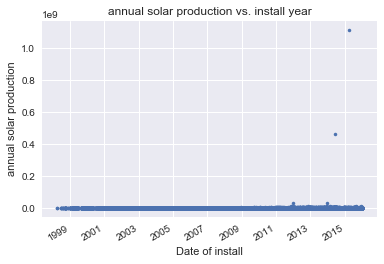

In [57]:
### annual solar power production.  units are kwH/yr?  Think there are issues
### with 1k divisor and/or year multiplier
dfFull.annual_PV_prod.plot(marker='.', linestyle='none')
plt.xlabel('Date of install')
plt.ylabel('annual solar production')
plt.title('annual solar production vs. install year');

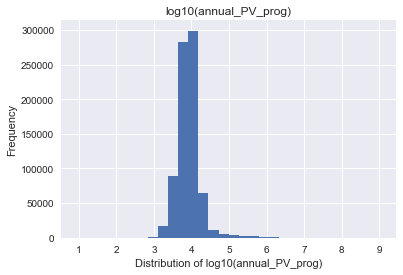

In [58]:
### now a histogram of log
np.log10(dfFull.annual_PV_prod).plot(kind='hist', bins=30)
plt.xlabel('Distribution of log10(annual_PV_prog)')
plt.ylabel('Frequency')
plt.title('log10(annual_PV_prog)');

In [59]:
### Okay, a few outliers on the high size
print(dfFull[dfFull.annual_PV_prod > 10 ** 7]['annual_PV_prod'])

date_installed
2011-11-07    1.067801e+07
2011-12-30    3.063050e+07
2013-12-13    2.868939e+07
2014-06-11    4.646728e+08
2015-04-15    1.113476e+09
2015-08-31    1.257042e+07
2015-12-18    1.102429e+07
Name: annual_PV_prod, dtype: float64


In [60]:
### Outliers on the low side.  That's a lot cheaper to do... 
print(dfFull[dfFull.annual_PV_prod < 10 ** 3]['annual_PV_prod'].count())

865


##### Annual_insolation

Text(0.5,1,'annual_insolation vs. install_date ')

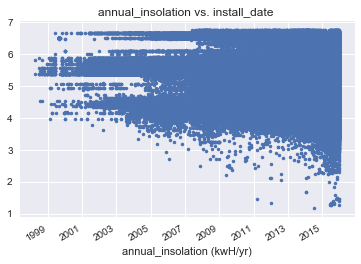

In [61]:
### This has no impact on price.
### Curiosity only.  Annual_insolation units are kWh/m2/day or something like that.
### Data docs say they calculate it from the zipcode.  This is apparently an annual
### number and they document a daily number

### annual insolation units are kwH/yr
dfFull.annual_insolation.plot(marker='.', linestyle='none')
plt.xlabel('install_date')
plt.xlabel('annual_insolation (kwH/yr)')
plt.title('annual_insolation vs. install_date ')
# np.log10(dfFull.annual_insolation).plot(marker='.', linestyle='none', ax=axs[1]);

##### rebate 

In [62]:
### This column is obj.  What kinds of things does it contain??
theRebates = dfFull.rebate.dropna()
theRebates.head()
### no more NA in theRebates
theRebates.count()

386698

In [63]:
### most of them are floats; looks like a couple of K are something else
theRebates.apply(lambda item: True if type(item) == type(123.45) else False).sum()

384533

In [64]:
# vector that will select the floats
myVec = theRebates.apply(lambda item: True if type(item) == type(123.45) else False)

In [65]:
# look at the ones that aren't floats
theRebates[~myVec].head(3)
# funny they look like floats, but...

date_installed
2001-07-22    15867.0
2001-11-21    18920.0
2001-12-06    16320.0
Name: rebate, dtype: object

In [66]:
# they're really strings
theRebates[~myVec].head(3).apply(type)

date_installed
2001-07-22    <class 'str'>
2001-11-21    <class 'str'>
2001-12-06    <class 'str'>
Name: rebate, dtype: object

In [67]:
# defer this for now.  handle in cleaning phase
# check the types
# same number as I have above for floats.
theRebates.apply(type).value_counts()

<class 'float'>    384533
<class 'str'>        2165
Name: rebate, dtype: int64

##### sales_tax_cost
Defering for now. I don't think it's a large factor in cost, though could matter for high tax states (e.g. CA) For completeness, I'll look at this, but it looks like there's bad data (off by factor of 10 or 100).  The excel version of this field might be cleaned up.

In [68]:
full_stc = dfFull.sales_tax_cost.dropna()

In [69]:
# they're supposed to be floats
full_stc.head()

date_installed
2000-01-03     787.769510
2000-01-06     384.595726
2000-01-06     350.862362
2000-01-06    1237.921639
2000-01-20     262.098811
Name: sales_tax_cost, dtype: float64

In [70]:
# std is very high; something's funny.
# did someone use a percent multiplier rather than than the decimal?
# clearly a calculated value.  Actuals would be 2 decimals.
dfFull.sales_tax_cost.describe()

count    355309.000000
mean       2657.135224
std       14579.815550
min          10.130237
25%         764.153153
50%        1118.821468
75%        1674.020650
max      872902.116200
Name: sales_tax_cost, dtype: float64

In [71]:
# how many > 3 x mean
full_stc[full_stc > 3 * 2657].count()

10343

In [72]:
# how many > 10 x mean
full_stc[full_stc > 10 * 2657].count()

4083

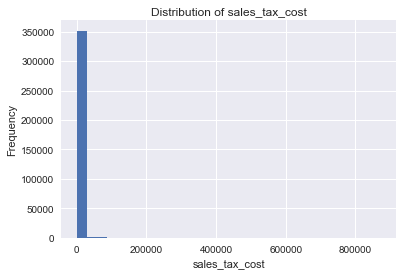

In [73]:
# let's see what the distribution is like.
# Range is pretty hard to believe; though cost might prove informative.
full_stc.plot(kind='hist', bins=30);
plt.xlabel('sales_tax_cost')
plt.ylabel('Frequency')
plt.title('Distribution of sales_tax_cost');

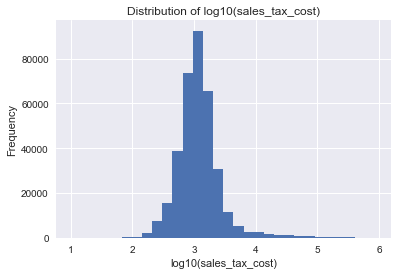

In [74]:
# Now the log 
# Range is pretty hard to believe; though cost might prove informative.
np.log10(full_stc).plot(kind='hist', bins=30);
plt.xlabel('log10(sales_tax_cost)')
plt.ylabel('Frequency')
plt.title('Distribution of log10(sales_tax_cost)');

##### Tilt and Azimuth
These are features of the installation (generally calculated to maximize total output) but not one that increases cost.

In [75]:
theTilts = dfFull.tilt1.dropna()

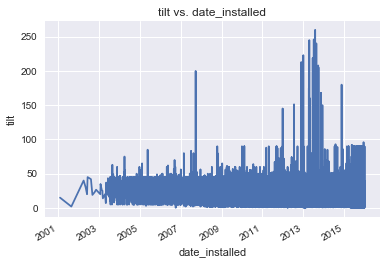

In [76]:
### hard to interpret
theTilts.plot()
plt.xlabel('date_installed')
plt.ylabel('tilt')
plt.title('tilt vs. date_installed');

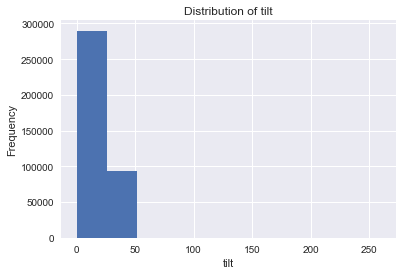

In [77]:
# distribution please
# okay that's better
#
theTilts.plot(kind='hist')
plt.xlabel('tilt')
plt.ylabel('Frequency')
plt.title('Distribution of tilt');

In [78]:
azi = dfFull.azimuth1.dropna(); azi.head()

date_installed
1999-12-01    180.0
2001-02-02    270.0
2001-04-23    180.0
2001-04-30    180.0
2001-08-23    180.0
Name: azimuth1, dtype: float64

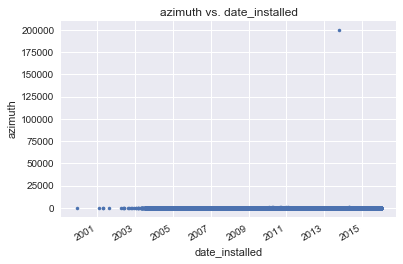

In [79]:
# there's some bad data
azi.plot(marker='.', linestyle='none')
plt.xlabel('date_installed')
plt.ylabel('azimuth')
plt.title('azimuth vs. date_installed');

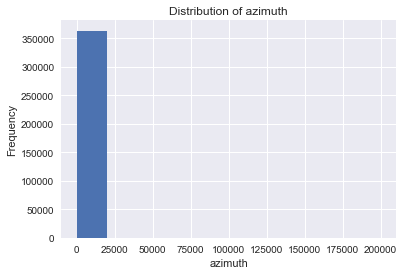

In [80]:
# distribution
# badness at high end
azi.plot(kind='hist')
plt.xlabel('azimuth')
plt.ylabel('Frequency')
plt.title('Distribution of azimuth');

In [81]:
# bad data
azi[azi > 360.0]

date_installed
2009-11-18       390.0
2009-12-21       390.0
2010-02-03       450.0
2010-03-05       390.0
2010-03-05       374.0
2010-03-09       390.0
2010-03-24       370.0
2010-03-31       420.0
2010-04-14       400.0
2010-05-07       370.0
2010-05-17       368.0
2010-06-08       378.0
2010-06-09       390.0
2010-06-28       380.0
2010-07-30       363.0
2010-08-13       380.0
2010-09-07       405.0
2010-09-24       405.0
2010-12-17       450.0
2011-01-31       400.0
2011-02-18       372.0
2011-04-15       367.0
2013-10-16    200100.0
2014-04-24       420.0
2014-05-01       540.0
Name: azimuth1, dtype: float64

##### tracking_type

There is another column called tracking (boolean).  There's probably not enough data here to do anything with.

In [82]:
dfFull.tracking_type.describe()

count     526058
unique         4
top        Fixed
freq      524386
Name: tracking_type, dtype: object

In [83]:
dfFull.tracking_type.value_counts()

Fixed          524386
Single-Axis       844
Dual-Axis         541
Mixed             287
Name: tracking_type, dtype: int64

##### manuf_1, manuf_2, manuf_3

List of manufacturers of the PV modules.  Could be useful, but since the mixes aren't given, it's hard to understand what to do with it.  More analysis could point the way (e.g. does the same manufacturer show up in multiple variables?  Are these all mixed?)

In [84]:
print(dfFull.manuf1_clean.describe())
print(dfFull.manuf1_clean.value_counts())

count       201121
unique          22
top       SunPower
freq         83310
Name: manuf1_clean, dtype: object
SunPower                              83310
Canadian Solar                        47629
Sharp                                 33129
LG Electronics Solar Cell Division    11639
AU Optronics                           6294
ET Solar Industry                      5088
Schuco USA                             4699
Phono Solar Technology                 3004
Andalay Solar                          1595
GE Energy                              1572
MAGE Solar                             1558
Chint Solar (Zhejiang)                  563
Siemens                                 330
Westinghouse Solar                      266
Open Energy                             152
Yes! Solar                              143
Helios USA                              129
Honeywell                                11
Powercom                                  4
CFM                                       3
GreenVolts

In [85]:
print(dfFull.manuf2_clean.describe())
print(dfFull.manuf2_clean.value_counts())

count       231607
unique         183
top       SunPower
freq         83629
Name: manuf2_clean, dtype: object
SunPower                                               83629
Canadian Solar                                         48372
Sharp                                                  33218
LG Electronics Solar Cell Division                     10358
Trina Solar                                             9893
AU Optronics                                            6327
ET Solar Industry                                       5136
Kyocera Solar                                           4993
Schuco USA                                              4712
Phono Solar Technology                                  3008
REC Solar                                               2912
Yingli Green Energy                                     2265
Andalay Solar                                           1604
SolarWorld                                              1573
GE Energy                           

In [86]:
print(dfFull.manuf3_clean.describe())
print(dfFull.manuf3_clean.value_counts())

count       209653
unique         121
top       SunPower
freq         83329
Name: manuf3_clean, dtype: object
SunPower                                                 83329
Canadian Solar                                           47681
Sharp                                                    33134
LG Electronics Solar Cell Division                       11311
AU Optronics                                              6293
ET Solar Industry                                         5089
Schuco USA                                                4700
Phono Solar Technology                                    3006
Trina Solar                                               2869
Kyocera Solar                                             1977
Andalay Solar                                             1596
GE Energy                                                 1572
MAGE Solar                                                1554
REC Solar                                                 1008
Yingli G

##### inv_man_clean     
Manufacturer of the inverter.  This is potentially of interest as the inverter is one of the highest cost components of the installation.

In [87]:
inv_man = dfFull.inv_man_clean.dropna()
print(inv_man.describe())

count        49933
unique          22
top       SunPower
freq         42793
Name: inv_man_clean, dtype: object


In [88]:
inv_man.value_counts()

SunPower                              42793
Solectria                              3219
Sharp                                  1873
Schuco USA                             1185
AU Optronics                            156
GE Energy                               131
MAGE Solar                              108
Yes! Solar                               99
CFM                                      80
Siemens                                  72
ET Solar Industry                        56
Powercom                                 34
Open Energy                              29
Canadian Solar                           26
LG Electronics Solar Cell Division       25
Phono Solar Technology                   19
Westinghouse Solar                       10
GreenVolts                                7
Honeywell                                 7
Andalay Solar                             2
Chint Solar (Zhejiang)                    1
Helios USA                                1
Name: inv_man_clean, dtype: int6

##### reported_annual_energy_prod

There's some doubt in my mind whether these are properly reported.  Median is 8.25k.  Presumably that is 8.25kw.  That sounds like a daily figure.  The high values may not have been properly normalized.

In [89]:
dfFull.reported_annual_energy_prod.describe()

count    2.044290e+05
mean     2.001290e+04
std      1.864263e+05
min      8.841482e-01
25%      5.569000e+03
50%      8.250000e+03
75%      1.190274e+04
max      3.500000e+07
Name: reported_annual_energy_prod, dtype: float64

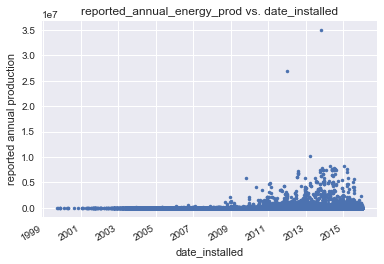

In [90]:
dfFull.reported_annual_energy_prod.plot(marker='.', linestyle='none')
plt.xlabel('date_installed')
plt.ylabel('reported annual production')
plt.title('reported_annual_energy_prod vs. date_installed');

In [91]:
(dfFull.reported_annual_energy_prod > 100000).sum()

2892

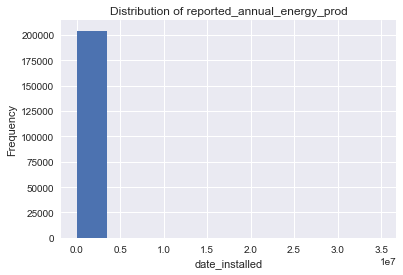

In [92]:
dfFull.reported_annual_energy_prod.plot(kind='hist')
plt.xlabel('date_installed')
plt.ylabel('Frequency')
plt.title('Distribution of reported_annual_energy_prod');

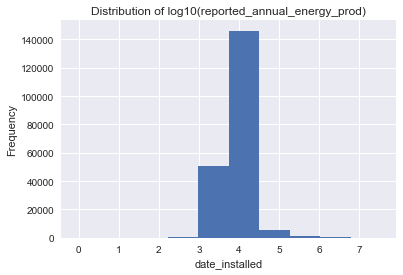

In [93]:
# check the log
np.log10(dfFull.reported_annual_energy_prod).plot(kind='hist')
plt.xlabel('date_installed')
plt.ylabel('Frequency')
plt.title('Distribution of log10(reported_annual_energy_prod)');

##### pbi_length

Performance Based Incentive program length.  This might conceivably be of interest because it impacts perceived cost (and TCO).  There is no corresponding PBI amount data.   

In [94]:
dfFull.pbi_length.describe()

count    5427.000000
mean        7.313064
std         5.542901
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        20.000000
Name: pbi_length, dtype: float64

##### bipv_3, bipv_2, bipv_1

Building Integrated Photo Voltaics has to do with whether the PV module is built into a construction material (i.e. shingle, roofing panel.  Apparently these are boolean variables.

In [95]:
### All ones...
dfFull[['bipv_1', 'bipv_2', 'bipv_3']].describe()

,bipv_1,bipv_2,bipv_3
count,5255.0,5255.0,5255.0
mean,1.0,1.0,1.0
std,0.0,0.0,0.0
min,1.0,1.0,1.0
25%,1.0,1.0,1.0
50%,1.0,1.0,1.0
75%,1.0,1.0,1.0
max,1.0,1.0,1.0


### save this data for next phase

In [96]:
# already done
# dfFull.to_csv('./data/live_20171219.csv')